# Chapter 6 Jupyter Notebook

## What & Why

Basically I'm hoping to do three things with this, namely:

1. This is an exercise in maintaining and expaning my skill set in Julia programing, LaTeX typesetting, and usage of jupyter notebooks. These skills are definitely important in working with science programing. Even if there is nothing computationally complex here, I can keep these skills sharp and develop them as the material I'm studying gets more complex.
2. I can share what I'm working on and how I'm approaching it. This is also good practice for managing more complex data. One of the most important things in data analysis is maintaining a _chain of custody_. While this also refers to managing who collects data and how, it also covers how data is manipulated, cleaned, and otherwise transformed. A jupyter notebook is a great tool for this.
3. I can check my calculations algorithmically. While none of these calculations are particularly difficult, they can become messy with paper and pen, and I am prone to transcription errors. While the first two points are far more important, this isn't without some importance. Also, I can prototype relationships and draw plots, which could be helpful as long as I don't spend too much time working on this and not the actual material.

It should be noted that I probably spent too much time today on this. However, much of this was on tooling and set up. As long as my pace picks up, I think this small investment will pay off in the long run.

## OK, what should I do with this?

You don't really have to do anything with this. You can chose to ignore it completely. You can dive into the code if you really want to, but it would probably be best to just ignore that. You can tell the difference between the "cells" that are programming code and those that are the markdown code (which this cell is, and has the actual human-specific stuff) by the presence of `In [#]:`. That prefix indicates that the cell is programming input, you can see the output beneath it in a cell called `Out[#]:`, every cell that doesn't have these prefixes are what is for presentation.



In [1]:
macro javascript_str(s) display("text/javascript", s); end

@javascript_str (macro with 1 method)

In [2]:
javascript"""
MathJax.Extension["TeX/cancel"]={version:"2.4.0",ALLOWED:{color:1,mathcolor:1,background:1,mathbackground:1,padding:1,thickness:1}};MathJax.Hub.Register.StartupHook("TeX Jax Ready",function(){var c=MathJax.InputJax.TeX,a=MathJax.ElementJax.mml,b=MathJax.Extension["TeX/cancel"];b.setAttributes=function(h,e){if(e!==""){e=e.replace(/ /g,"").split(/,/);for(var g=0,d=e.length;g<d;g++){var f=e[g].split(/[:=]/);if(b.ALLOWED[f[0]]){if(f[1]==="true"){f[1]=true}if(f[1]==="false"){f[1]=false}h[f[0]]=f[1]}}}return h};c.Definitions.Add({macros:{cancel:["Cancel",a.NOTATION.UPDIAGONALSTRIKE],bcancel:["Cancel",a.NOTATION.DOWNDIAGONALSTRIKE],xcancel:["Cancel",a.NOTATION.UPDIAGONALSTRIKE+" "+a.NOTATION.DOWNDIAGONALSTRIKE],cancelto:"CancelTo"}},null,true);c.Parse.Augment({Cancel:function(e,g){var d=this.GetBrackets(e,""),f=this.ParseArg(e);var h=b.setAttributes({notation:g},d);this.Push(a.menclose(f).With(h))},CancelTo:function(e,g){var i=this.ParseArg(e),d=this.GetBrackets(e,""),f=this.ParseArg(e);var h=b.setAttributes({notation:a.NOTATION.UPDIAGONALSTRIKE+" "+a.NOTATION.UPDIAGONALARROW},d);i=a.mpadded(i).With({depth:"-.1em",height:"+.1em",voffset:".1em"});this.Push(a.msup(a.menclose(f).With(h),i))}});MathJax.Hub.Startup.signal.Post("TeX cancel Ready")});MathJax.Ajax.loadComplete("[MathJax]/extensions/TeX/cancel.js");
"""

In [107]:
using PeriodicTable, DataStructures, Unitful, Plots

const g = u"g"
const mol = u"mol"
const L = u"L"
const atm = u"atm"
const K = u"K"
const R = 0.08205736608096L*atm*mol^-1*K^-1 # Gas constant
const °C = u"°C"
const N_a = 6.0221408e23mol^-1

6.0221408e23 mol^-1

In [4]:
struct Molecule
    charge::Int
    elements::Array{Tuple{Symbol, Int}}
end

In [5]:
h2 = Molecule(0, [(:H, 2)])

Molecule(0, [(:H, 2)])

In [28]:
function get_molar_mass(atoms::Array{Tuple{Symbol, Int}})
    total_moles = 0g/mol
    for (atom, number_of) in atoms 
        total_moles += number_of * uconvert(g, elements[atom].atomic_mass)*N_a 
    end
    return total_moles
end

function get_molar_mass(molecule::Molecule)
    return get_molar_mass(molecule.elements)
end

function get_molar_mass(atom::Symbol)
    return uconvert(g, elements[atom].atomic_mass)*N_a
end

get_molar_mass (generic function with 3 methods)

In [7]:
get_molar_mass(h2)

2.0160000126939006 g mol^-1

In [8]:
function volume_of_ideal_gas(n, T=273.15K, P=1.00atm)
    return n*R*T / P
end

volume_of_ideal_gas (generic function with 3 methods)

## Conceptual Question 6.3 - Molar Volume

Assuming ideal behavior, which of these gas samples has
the greatest volume at STP?
- (a) 1 g of $H_{2}$
- (b) 1 g of $O_{2}$
- (c) 1 g of $Ar$

### My Answer
  
So we need to get the moles of $H_{2}$ as follows: $1 \cancel{g} H_{2} \times \frac{1mol}{2.016 \cancel{g}} = \frac{1}{2.016}mol H_{2}$
We'll need to do the same thing for the Oxygen and Argon gas. Then we run it through the ideal gas equation...

In [9]:
# My molar mass function inverted should provide the same answer, but let's check to be sure... 

get_molar_mass([(:H, 2)])^-1 * 1g == 1mol/2.016

false

#### OK, looks like my changes have made this false...how false?

In [10]:
1mol/2.016

0.49603174603174605 mol

In [11]:
get_molar_mass([(:H, 2)])^-1 * 1g

0.49603174290844365 mol

OK, doesn't look that not false, rounding error. Out of curiosity, how significant is this error?

In [12]:
1 - (get_molar_mass([(:H, 2)])^-1 * 1g) / (1mol/2.016)

6.2965775926571155e-9

Seems like about a billionth of a problem. So we'll approximate and say there is no problem here.

In [13]:
# So why not do this with variables
mm_h2_gas = get_molar_mass([(:H, 2)])^-1 * 1g
mm_o2_gas = get_molar_mass([(:O, 2)])^-1 * 1g
mm_ar_gas = get_molar_mass([(:Ar, 1)])^-1 * 1g

println("The moles of hydrogen gas is $mm_h2_gas and has a volume of $(volume_of_ideal_gas(mm_h2_gas))")
println("The moles of oxygen gas is $mm_o2_gas and has a volume of $(volume_of_ideal_gas(mm_o2_gas))")
println("The moles of argon gas is $mm_ar_gas and has a volume of $(volume_of_ideal_gas(mm_ar_gas))")

The moles of hydrogen gas is 0.49603174290844365 mol and has a volume of 11.11804037891018 L
The moles of oxygen gas is 0.03125195305029759 mol and has a volume of 0.7004803238915845 L
The moles of argon gas is 0.025032479484716978 mol and has a volume of 0.5610772328066397 L


So the **answer appears to be (a)**, this must be because there are far more of those small hydrogen atoms in a gram of gas. I could have probably guessed this instead of going through all this rigamarole of setting up a Jupyter notebook for Julia 1.7.3, learning how to strikeout text in mathmode in LaTeX, how to manupulate units with the Unitful package, and such, but a) that was kinda fun and b) this will be useful for future things, and it makes it easier to share my work so 👍

In [14]:
# So then let's see our molar masses...
println("The molar mass of hydrogen gas is $(get_molar_mass([(:H, 2)]))")
println("The molar mass of oxygen gas is $(get_molar_mass([(:O, 2)]))")
println("The molar mass of argon gas is  $(get_molar_mass([(:Ar, 1)]))")

The molar mass of hydrogen gas is 2.0160000126939006 g mol^-1
The molar mass of oxygen gas is 31.998000201477893 g mol^-1
The molar mass of argon gas is  39.94810025153632 g mol^-1


Yeah, 2.016 << 31.998, so that makes sense.

## Lil' Intelude

So from [this](https://www.engineeringtoolbox.com/molecular-mass-air-d_679.html) it turns out that the molar mass of an average sample of air should be close to $28.9647 g/mol$. Also, to quoteth from the text:

> a gas with a molar mass lower than that of air tends to rise in air.

So, hydrogen gas should rise, whereas oxygen gas and argon gas should sink.

## Conceptual Question 6.4 - Density of a Gas

Arrange the following gases in order of increasing density at STP: $Ne$, $Cl_{2}$ , $F_{2}$ , and $O_{2}$:

- (a) $Ne < O_{2} < F_{2} < Cl_{2}$
- (b) $F_{2} < Ne < O_{2} < Cl_{2}$
- (c) $Cl_{2} < F_{2} < O_{2} < Ne$

### My Answer

As from the previous example, this probably can be determined simply based on the increasing molar mass of the gas. 

This is based on the density equation: 
$d = \frac{PM}{RT}$

Given that "M" is the molar mass, and that value is in the numerator, increasing values of molar mass should result in denser gases. Since the molar mass of an element increases with atomic number, all else equal, the atom with a higher molar mass should be further to the right. However, given that some of these gases are formed from diatomic molecules, there is a bit of a curve here.

(c) is definitely out, as Cl is in the third period and thus a much heavier atom than the others in the second period. Also, (b) is out as two oxygen atoms should have less mass than two fluorine atoms. So by process of elimination _the answer should be (a)_. Let's check this, first by the molar masses and then by checking the actual densities.

In [15]:
# Checking the molar masses...in order of atomic number
println("The molar mass of oxygen gas is $(get_molar_mass([(:O, 2)]))")
println("The molar mass of fluorine gas is $(get_molar_mass([(:F, 2)]))")
println("The molar mass of neon gas is $(get_molar_mass([(:Ne, 1)]))")
println("The molar mass of chlorine gas is $(get_molar_mass([(:Cl, 2)]))")

The molar mass of oxygen gas is 31.998000201477893 g mol^-1
The molar mass of fluorine gas is 37.99680656644985 g mol^-1
The molar mass of neon gas is 20.17976012706343 g mol^-1
The molar mass of chlorine gas is 70.90000044642737 g mol^-1


In [16]:
# So now let's write a function to check densities...
function calculate_density_of_gas(M, P=1.00atm, T=273.15K)
    return (P*M) / (R*T)
end

calculate_density_of_gas (generic function with 3 methods)

In [17]:
# Checking our assumption
correct_order = [(:Ne, 1), (:O, 2), (:F, 2), (:Cl, 2)]
masses = [get_molar_mass([(sym, num)]) for (sym,num) in correct_order]


4-element Vector{Quantity{Float64, 𝐌 𝐍^-1, Unitful.FreeUnits{(g, mol^-1), 𝐌 𝐍^-1, nothing}}}:
  20.17976012706343 g mol^-1
 31.998000201477893 g mol^-1
  37.99680656644985 g mol^-1
  70.90000044642737 g mol^-1

In [18]:
all([x < masses[ind+1] for (ind, x) in enumerate(masses) if ind < length(masses)])

true

In [19]:
densities = [calculate_density_of_gas(gas_mass) for gas_mass in masses]

4-element Vector{Quantity{Float64, 𝐌 𝐋^-3, Unitful.FreeUnits{(g, L^-1), 𝐌 𝐋^-3, nothing}}}:
 0.9003206721833095 g L^-1
 1.4275918478971767 g L^-1
 1.6952287942633473 g L^-1
 3.1632058883652054 g L^-1

In [20]:
all([x < densities[ind+1] for (ind, x) in enumerate(densities) if ind < length(densities)])

true

**So the answer is, in fact, (a)**

## Conceptual Question 6.6 - Partial Pressures 

A gas mixture contains an equal number of moles of $He$ and $Ne$. The total pressure of the mixture is $3.0 atm$. What are the partial pressures of $He$ and $Ne$?
- (a) P He = 2.0 atm; P Ne = 1.0 atm
- (b) P He = 1.0 atm; P Ne = 2.0 atm
- (c) P He = 1.5 atm; P Ne = 1.5 atm

### My answer

This is pretty simple. As the equation for partial pressure is $P_{a} = \mathcal{X}_{a}P_{total}$. Since the molar pressure $X_{a} = \frac{P_{a}}{P_total} = \frac{n_{a}}{n_{total}}$ and we know that the moles $n_{He} = n_{Ne}$, then $\mathcal{X}_{a}$ must equal $\frac{1}{2}$. We can check this by solving for $P_{total}$: 
$$
P_{a} = \mathcal{X}_{a}P_{total} \\
(1.5) = \left(\frac{1}{2}\right)P_{total} \\
P_{total} = \frac{1.5}{\frac{1}{2}} \\
P_{total} = 3.0
$$

In [21]:
# Just making sure...
1.5 / .5 == 3.0

true

## Another lil' Interlude

Again from the book...

> On top of Mount Everest, where the total pressure is
0.311 atm, the partial pressure of oxygen is only 0.065 atm. Low
oxygen levels produce a physiological condition called hypoxia
or oxygen starvation

![title](img/oxygen_partial_pressure_limits.png)

Also from the book (emphasis added)...

> Severe hypoxia, which occurs when 
$P_{O_{2}}$ drops below 0.1 atm, may result in unconsciousness or even death. For this reason, climbers hoping to make the
summit of Mount Everest _**usually**_ carry oxygen to breathe.

My only guess to the usually here is that they are assuming that someone might not have? Or maybe someone did? If the latter, I can't imagine that moron surived...

## Conceptual Question 6.6 - Pressure and Number of Moles

Nitrogen and hydrogen
react to form ammonia according to the following equation:

$$
N_{2}(g) + 3H_{2}(g) \rightleftharpoons 2NH_{3} ( g)
$$

Consider the following representations of the initial mixture of reactants and the
resulting mixture after the reaction has been allowed to react for some time:

![title](img/cc66_img.png)

If the volume is kept constant, and nothing is added to the reaction mixture, what happens to the total pressure during the course of the reaction?

- (a) The pressure increases.
- (b) The pressure decreases.
- (c) The pressure does not change.

### My answer

This is interesting and beyond the ideal gas equation, the image also suggests why the answer is (b). As pointed out in section 6.2, the pressure from a gas comes the force of the molecules striking the sides of the container. Since there are less molecules (11 in the first picture, 7 in the second), there are less potential collisions at any point.

Also, from the ideal gas law...

$$
P = \frac{nRT}{V}
$$

It's explicitly declared that the volume is kept constant, and R is a constant we can remove these from the equation:

$$
P = \frac{nRT}{V} \\
P = \frac{n\cancel{R}T}{\cancel{V}} \\
P = nT
$$

Temperature is not explicitly mentioned, but I think it can be safely assumed to be constant. As such, $P \propto n$, and if $n$ decreases so does $P$. 

## Conceptual Question 6.7 - Pressure and number of moles

How does the approximate root
mean square velocity of neon compare to that of krypton at the same temperature?

- (a) The root mean square velocity of Ne is approximately four times that of Kr.
- (b) The root mean square velocity of Ne is approximately two times that of Kr.
- (c) The root mean square velocity of Ne is approximately one-half that of Kr.
- (d) The root mean square velocity of Ne is approximately one-fourth that of Kr.

### My Answer

This can be found pretty easily by using the root mean square velocity formula: 

$$
u_{rms} = \sqrt{\frac{3RT}{\mathcal{M}}}
$$

The one difference to keep in mind is that the gas constant will need to be adjusted, the book notes from molar volume to molar mass, as well as adjusting from pressure to velocity. The book does not go into detail here, so I think it would be useful to include it here, as I have less in terms of space limitations. There is a useful [Wikipedia article on the gas constant](https://en.wikipedia.org/wiki/Gas_constant#Dimensions), which I'm drawing from here.

We are currently using the following version of the constant:

$$
R = \frac{\frac{force}{area} \times volume}{ammount \times tempature} = \frac{atm \times L}{mol \times K}
$$

The article shows how to convert this to the form we need, which is...

$$
R = \frac{mass \times length^{2}}{amount \times temperature \times time^{2}} = \frac{kg \times m^{2}}{mol \times K \times s^{2}}
$$

I was having some problems getting my function to match the book's figures for the root mean square velocity of Hydrogen and Nitrogen. Part of the problem was that I was not including Avogadro's number, but the other issue was a little more illusive. Long story->short, I was not taking into account that both hydrogen and nitogen are diatomic molecules at room temperature. A brief web search shows there is an easy way to account for this, as [this article details](https://www.thoughtco.com/what-are-the-seven-diatomic-elements-606623). Apparently, elements that end in "-gen" form stable pure element diatomic molecules and can be remembered by this helpful neumonic:

| Atom | Phrase | Atomic Name |
| - | ------ | -------- |
| H | "Have" | Hydrogen |
| N | "No"   | Nitrogen |
| F | "Fear" | Fluorine |
| O | "Of" | Oxygen |
| I | "Ice" | Iodine |
| Cl | "Cold" | Chlorine |
| Br | "Beer" | Bromine |

The hardest part is remembering that "Cold" is not refering to Carbon. This requires some conceptual know-how in recognizing that Carbon cannot form a stable bond with itself, but that's not too hard.

In [22]:
function rms_velocity(atomic_symbol, T=298.15K)
    _R = uconvert(u"kg*m^2*s^-2*K^-1*mol^-1", R)
    diatomic_weight = atomic_symbol in [:H, :N, :F, :O, :I, :Cl, :Br] ? 2 : 1
    M = N_a*uconvert(u"kg", elements[atomic_symbol].atomic_mass)*diatomic_weight
    return √(3*_R*T / M)
end
       


rms_velocity (generic function with 2 methods)

In [23]:
rms_velocity(:H)

1920.6572125099383 m s^-1

In [24]:
rms_velocity(:N)

515.2376173305167 m s^-1

#### Good

That matches what I'm seeing in the book. So let's compare the results of the algorithm on the question then.

In [25]:
values = [(:a, 4), (:b, 2), (:c, 0.5), (:d, 0.25)]
correct = []
ne_velocity = rms_velocity(:Ne)

for (answer, weight) in values
    if ne_velocity - ne_velocity*0.05 < rms_velocity(:Kr)*weight < ne_velocity + ne_velocity*0.05
        push!(correct, answer)
    end
end
println("Correct answers are: $(join(correct, ','))")

Correct answers are: b


Well, there we go: _The root mean square velocity of Ne is approximately two times that of Kr._

## Conceptual Question 6.8 - Kinetic Molecular Theory

Which sample of an ideal gas has
the greatest pressure? Assume that the mass of each particle is proportional to its size and
that all the gas samples are at the same temperature.

![title](img/cc68_img.png)

## My answer

An important relation is outlined in equation \[6.18\], namely:

$$
P \propto mv^{2} \times \frac{n}{V}
$$

Since, as outlined in equation \[6.19]\: $ mv^{2} \propto T$ and temperature is held constant, we can remove velocity from consideration as mass should remain constant. This leaves us with $P \propto \frac{mn}{V}$.

The number of molecules is 7 for (a), 7 for (b), and 11 for (c). So that should remove (a) from consideration as it's mass is apparently the same as (c). The tricky part is determining what the "mass" of these particles is. I think a good estimate, if maybe a little generous, is that the (b) molecules are 4 times the size of the (c) molecules. So, let's see how this relates to pressure...

In [26]:
pfn = (m,n) -> m*n / 1
println("Relative pressure is $(pfn(4, 1))P for (b) and $(pfn(1, (11-7)))P for (c)")

Relative pressure is 4.0P for (b) and 4.0P for (c)


So several possibilites...
- 1) I misestimated the size of (b)'s molecules, which seems likely. I can be argued either way at this point, but basically if I _over_-estimated than (c) is under the greatest pressure, and if I _under_-estimated than (b) is under the greatest pressure.
- 2) I estimated the size of (b)'s molecules correctly, and both (b) and (c) are under the greatest pressure.
- 3) I have a flaw in my reasoning and am just wrong.

## Conceptual Connection - 6.9: Graham's Law of Effusion

A glass tube contains an equal
number of moles of helium and argon. After five minutes, half of the particles escape
through a small hole in the glass. What are the relative amounts of helium and argon in
the tube at five minutes?

- (a) The tube still contains an equal number of moles of helium and argon.
- (b) The tube contains a greater number of moles of helium than argon.
- (c) The tube contains a greater number of moles of argon than helium.

## My answer

This is pretty straightforward, as seen in the relation between root mean square velocity and the rate of effusion: 

$$
rate \propto \frac{1}{\sqrt{\mathcal{M}}}
$$

Since 1 mol of $Ar$ is heavier than $He$, _I'd expect that the answer is (c)._ Since a larger value of $\mathcal{M}$ would result in a smaller rate of effusion.

In [30]:
mm_ar = get_molar_mass(:Ar)
mm_he = get_molar_mass(:He)
println("The mass of one mol of Ar is $mm_ar")
println("The mass of one mol of He is $mm_he and is $((mm_he/mm_ar)*100)% lighter than Ar")

The mass of one mol of Ar is 39.94810025153632 g mol^-1
The mass of one mol of He is 4.002602225202696 g mol^-1 and is 10.019505808786901% lighter than Ar


In [31]:
# So pretty obvious, but let's just be clear...
1/√mm_he > 1/√mm_ar

true

**So yeah, the answer is (c)**

## Conceptual Connection - 6.10: Real Gases

The graph shows $\frac{PV}{RT}$ for carbon dioxide at three different
temperatures. Rank the curves in order of increasing temperature.

![title](img/cc610_img.png)

- (a) C < A < B
- (b) A < B < C
- (c) B < C < A
- (d) C < B < A

## My answer

I think this can be found from the Van der Waal's temperature correction to the ideal gas law:

$$
P = \frac{nRT}{V} - a\left(\frac{n}{V}\right)^{2}
$$

From table 6.5, the constant $a$ for $CO_{2}$ is 3.59

$$
P = \frac{nRT}{V} - a\left(\frac{n}{V}\right)^{2} \\
\frac{nRT}{V} = P + a\left(\frac{n}{V}\right)^{2} \\
T = \frac{V}{Rn}\left(P + a\left(\frac{n}{V}\right)^{2}\right) \\
T = \frac{PV}{Rn} + \frac{an}{VR}
$$



In [41]:
co2_temp = (P) -> ((P*1L)/(R*1mol)) + ((3.59L^2*atm*mol^-2*1mol)/(1L*R))

#19 (generic function with 1 method)

In [42]:
co2_temp(1000atm)

12230.346255689357 K

In [40]:
(1000atm*1L^3)/(R*1mol)

12186.59637470417 K L^2

$$
\frac{PV}{nRT} = 1 - \frac{an}{VRT} \\
(1.9) = 1 - \frac{(3.59\cancel{\frac{L^{2} \cdot atm}{mol^{2}}})(\cancel{1mol})}{(1\cancel{L})(0.08205736608096\cancel{\frac{atm \cdot L}{K \cdot mol})}T} \\
0.9 = -\frac{3.59}{0.08205736608096 \cdot T} \\
0.9\cdot T = -\frac{3.59}{0.08205736608096}
$$

In [43]:
R

0.08205736608096 atm L K^-1 mol^-1

$$
\left[P + a\left(\frac{n}{V}\right)^{2}\right] \times \left[V - nb \right] = nRT \\
T = \frac{\left[P + a\left(\frac{n}{V}\right)^{2}\right] \times \left[V - nb \right]}{nR}
$$

In [59]:
function temperature_of_gas(P, a, b, V=1L, n=1mol)
    return ((P + a*(n/V)^2)*(V - n*b)) / (n*R)
end

temperature_of_gas (generic function with 3 methods)

In [61]:
temperature_of_gas(1atm, 3.59L^2*atm*mol^-2, 0.0427L*mol^-1)

53.547989776624746 K

In [62]:
uconvert(u"°C", temperature_of_gas(1atm, 3.59L^2*atm*mol^-2, 0.0427L*mol^-1))

-219.60201022337523 °C

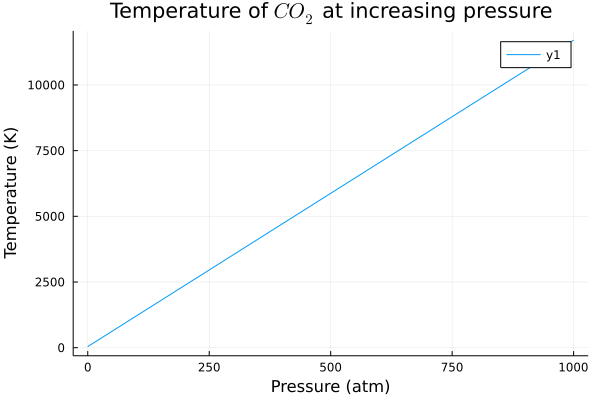

In [77]:
plot(
    [p for p in 0:1000],
    [ustrip(temperature_of_gas(p*atm, 3.59L^2*atm*mol^-2, 0.0427L*mol^-1)) for p in 0:1000], 
    title="Temperature of \$CO_{2}\$ at increasing pressure"
)
xlabel!("Pressure (atm)")
ylabel!("Temperature (K)")

$$
\left[P + a\left(\frac{n}{V}\right)^{2}\right] \left[V - nb \right] = nRT \\
\left[P + a\left(\frac{n}{V}\right)^{2}\right] = \frac{nRT}{\left[V - nb \right]} \\
P = \frac{nRT}{\left[V - nb \right]} - a\left(\frac{n}{V}\right)^{2}
$$

In [82]:
temps = [ustrip(temperature_of_gas(p*atm, 3.59L^2*atm*mol^-2, 0.0427L*mol^-1)) for p in 0:1000]

1001-element Vector{Float64}:
    41.88176106712044
    53.547989776624746
    65.21421848612906
    76.88044719563335
    88.54667590513766
   100.21290461464196
   111.87913332414627
   123.54536203365056
   135.21159074315486
   146.87781945265917
   158.54404816216348
   170.21027687166776
   181.87650558117207
     ⋮
 11579.781954766877
 11591.44818347638
 11603.114412185885
 11614.78064089539
 11626.446869604893
 11638.113098314398
 11649.779327023902
 11661.445555733406
 11673.11178444291
 11684.778013152414
 11696.44424186192
 11708.110470571422

In [86]:
(1000*atm*1L) / (R*temps[1]*K)

290.9762164769938 mol

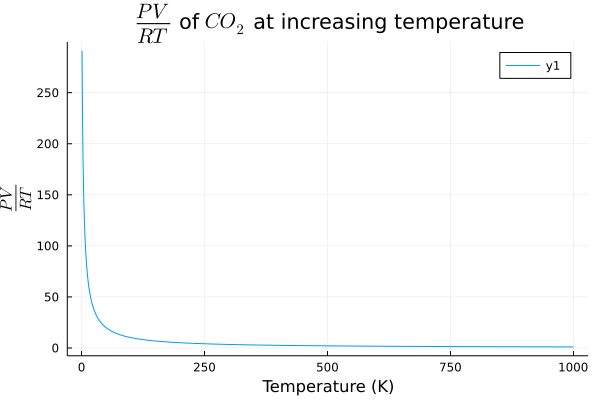

In [90]:
plot(
    [t for t in 1:1000],
    [(1000*atm*1L) / (1mol*R*temps[t]*K) for t in 1:1000], 
    title="\$\\frac{PV}{RT}\$ of \$CO_{2}\$ at increasing temperature"
)
xlabel!("Temperature (K)")
ylabel!("\$\\frac{PV}{RT}\$")



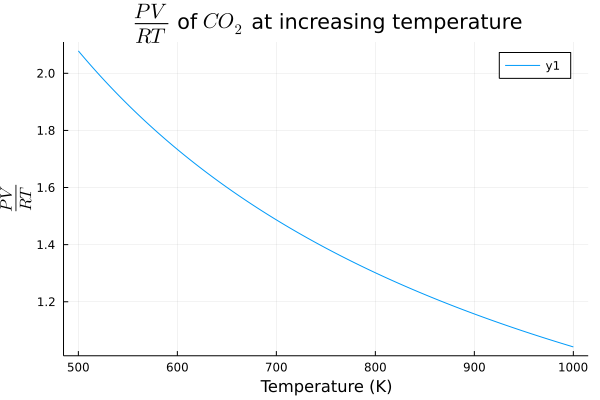

In [93]:
plot(
    [t for t in 500:1000],
    [(1000*atm*1L) / (1mol*R*temps[t]*K) for t in 500:1000], 
    title="\$\\frac{PV}{RT}\$ of \$CO_{2}\$ at increasing temperature"
)
xlabel!("Temperature (K)")
ylabel!("\$\\frac{PV}{RT}\$")

In [96]:
(1000*atm*1L) / (1mol*R*temps[length(temps)-1]*K)

1.0419060804041609

In [97]:
pvrt = (x) -> (1000*atm*1L) / (1mol*R*temps[x]*K)

#59 (generic function with 1 method)

In [101]:
[(t, pvrt(t)) for t in 500:1000 if 1.9-0.0005 < pvrt(t) < 1.9 + 0.005]

2-element Vector{Tuple{Int64, Float64}}:
 (546, 1.9041627028425743)
 (547, 1.900698006063443)

In [102]:
[(t, pvrt(t)) for t in 500:1000 if 1.4-0.0005 < pvrt(t) < 1.4 + 0.005]

3-element Vector{Tuple{Int64, Float64}}:
 (741, 1.4048126214075065)
 (742, 1.4029259285679472)
 (743, 1.401044296667616)

In [103]:
[(t, pvrt(t)) for t in 500:1000 if 1.1-0.0005 < pvrt(t) < 1.1 + 0.005]

5-element Vector{Tuple{Int64, Float64}}:
 (943, 1.1047119969039518)
 (944, 1.1035449530973365)
 (945, 1.1023803724737573)
 (946, 1.1012182472431795)
 (947, 1.1000585696483827)

### Aha! A pretty accurate answer

A is at 1.9 $\approx\frac{PV}{RT}$, B is 1.4 $\approx\frac{PV}{RT}$, and C is 1.1 $\approx\frac{PV}{RT}$. I mean the "$\frac{PV}{RT}$ of $CO_{2}$ at increasing temperature" graph shows that the answer is **(b)**, but now we know what the temperatures are...

In [113]:
println("CO₂ sample A is at ≈546K (or ≈$(uconvert(°C, temps[546]*K)))")
println("CO₂ sample B is at ≈742K (or ≈$(uconvert(°C, temps[742]*K)))")
println("CO₂ sample C is at ≈945K (or ≈$(uconvert(°C, temps[945]*K)))")

CO₂ sample A is at ≈546K (or ≈6126.826407746966 °C)
CO₂ sample B is at ≈742K (or ≈8413.407234809809 °C)
CO₂ sample C is at ≈945K (or ≈10781.651662839182 °C)
